In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### General linear model
$$ \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n $$

$ \hat{y} $ is the predictied value.

$ n $ is the number of features.

$ x_i $ is the ith feature value.

$ \theta_j $ is the jth model parameter, including the bias term $ \theta_0 $

In vectorised form

$$ \hat{y} = h_{\theta}(x) = \theta^T \cdot x $$

$ h_{\theta} $ is the hypotheses function, using the model predictions. 

The most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore,
to train a Linear Regression model, you need to find the value of θ that minimizes
the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE)
than the RMSE, and it leads to the same result (because the value that minimizes a
function also minimizes its square root)

**The Normal Equation** is the closed-form solution to finding the value of $\theta$ that minimises the cost function.

$$ \hat{\theta} = \left( X^T \cdot X \right)^{-1} \cdot X^T \cdot y $$

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

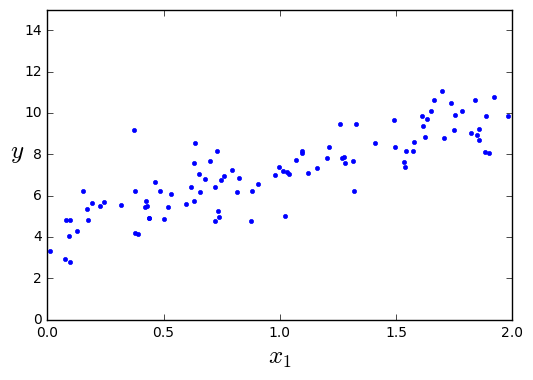

In [3]:
plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\hat{\theta}$ using the Normal Equation. We will use the ``inv()`` function from
NumPy’s Linear Algebra module (``np.linalg``) to compute the inverse of a matrix, and
the dot() method for matrix multiplication:

In [4]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance, the bias value.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[ 4.35844554],
       [ 2.84889346]])

Now predictions can be made using $\hat{\theta}$

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.35844554],
       [ 10.05623246]])

Plotting the model's predictions

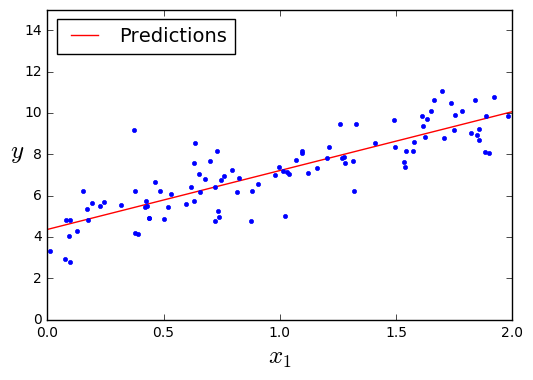

In [7]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

The same can be done in Scikit-Learn is very simple.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.35844554]), array([[ 2.84889346]]))

In [12]:
lin_reg.predict(X_new)

array([[  4.35844554],
       [ 10.05623246]])

### Computational Complexity
The Normal Equation computes the inverse of $X^T \cdot X$, which is an n × n matrix
(where n is the number of features). The computational complexity of inverting such a
matrix is typically about $O(n^{2.4})$ to $O(n^3)$ (depending on the implementation). In
other words, if you double the number of features, you multiply the computation
time by roughly $2^{2.4}= 5.3$ to $2^3 = 8$.

On the positive side, this equation is linear with regards to the number of instances in
the training set (it is O(m)), so it handles large training sets efficiently, provided they
can fit in memory.
Also, once you have trained your Linear Regression model (using the Normal Equation
or any other algorithm), predictions are very fast: the computational complexity
is linear with regards to both the number of instances you want to make predictions
on and the number of features. In other words, making predictions on twice as many
instances (or twice as many features) will just take roughly twice as much time.
Now we will look at very different ways to train a Linear Regression model, better
suited for cases where there are a large number of features, or too many training
instances to fit in memory.

## Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

Concretely, you start by filling θ with random values (this is called random initialization),
and then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum. 

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high it
might make the algorithm diverge, with larger and larger values, failing to find a good
solution.

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum very
difficult, i.e. it can converge to a local minimum,
which is not as good as the global minimum.

### Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost function
with regards to each model parameter $\theta_j$. In other words, you need to calculate
how much the cost function will change if you change $\theta_j$ just a little bit. This is called
a partial derivative. (Note, m is the number of training examples)

$$ \nabla_{\theta}\mbox{ MSE}(\theta) = \frac{2}{m}X^T\cdot (X \cdot \theta -y) $$

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step.

Once you have the gradient vector, which points uphill, just go in the opposite direction
to go downhill. This means subtracting $ \nabla_{\theta}\mbox{ MSE}(\theta)$ from $\theta$. This is where the
learning rate $\eta$ comes into play multiply the gradient vector by $\eta$ to determine the
size of the downhill step. 

$$\theta^{next} = \theta - \eta \nabla_{\theta}\mbox{ MSE}(\theta) $$

In [13]:
eta = 0.1
n_iterations = 1000
m = 100

In [14]:
theta = np.random.rand(2,1) #random initualisation

In [15]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [16]:
theta

array([[ 4.35844554],
       [ 2.84889346]])

That’s exactly what the Normal Equation found! Gradient Descent worked perfectly.
But what if you had used a different learning rate eta? Below shows the
first 10 steps of Gradient Descent using three different learning rates (the dashed line
represents the starting point).

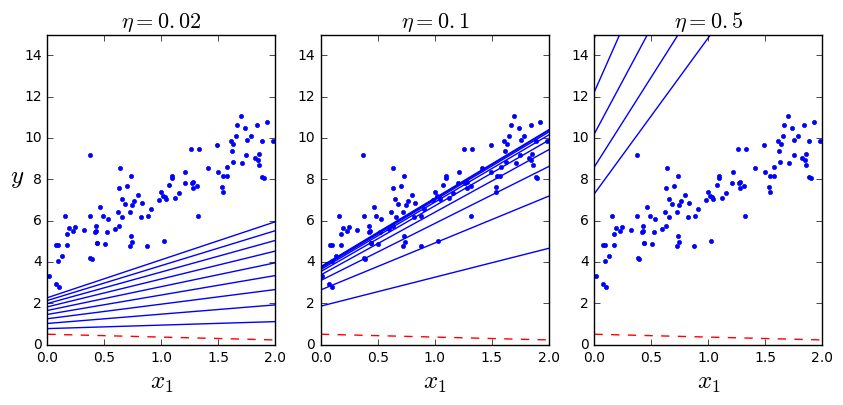

In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path_bgd.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time. In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution. On the right, the learning
rate is too high: the algorithm diverges, jumping all over the place and actually
getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search (see Chapter 2). However, you
may want to limit the number of iterations so that grid search can eliminate models
that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be
far away from the optimal solution when the algorithm stops, but if it is too high, you
will waste time while the model parameters do not change anymore. A simple solution
is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number $\epsilon$ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration (SGD can be implemented as an out-of-core algorithm.)

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down. So once the algorithm
stops, the final parameter values are good, but not optimal.

When the cost function is very irregular this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is called simulated annealing,
because it resembles the process of annealing in metallurgy where molten metal is
slowly cooled down. The function that determines the learning rate at each iteration
is called the learning schedule. If the learning rate is reduced too quickly, you may get
stuck in a local minimum, or even end up frozen halfway to the minimum. If the
learning rate is reduced too slowly, you may jump around the minimum for a long
time and end up with a suboptimal solution if you halt training too early.

In [18]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [19]:
def learning_schedule(t):
    return t0/(t+t1)

In [20]:
theta = np.random.randn(2,1) # random initialisation

In [21]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

By convention we iterate by rounds of m iterations; each round is called an epoch.
While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a fairly good
solution:

In [22]:
theta

array([[ 4.3171524 ],
       [ 2.88335975]])

Note that since instances are picked randomly, some instances may be picked several
times per epoch while others may not be picked at all. If you want to be sure that the
algorithm goes through every instance at each epoch, another approach is to shuffle
the training set, then go through it instance by instance, then shuffle it again, and so
on. However, this generally converges more slowly.

To perform Linear Regression using SGD with Scikit-Learn, you can use the ``SGDRegressor`` class, which defaults to optimizing the squared error cost function. The following
code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the
default learning schedule (different from the preceding one), and it does not use any
regularization (penalty=None; more details on this shortly):

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.01)

In [25]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.04805732]), array([ 3.11800522]))

### Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
Descent. It is quite simple to understand once you know Batch and Stochastic Gradient
Descent: at each step, instead of computing the gradients based on the full training
set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches.
The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

The algorithm’s progress in parameter space is less erratic than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima (in the case of problems that suffer from
local minima, unlike Linear Regression as we saw earlier).

In [27]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

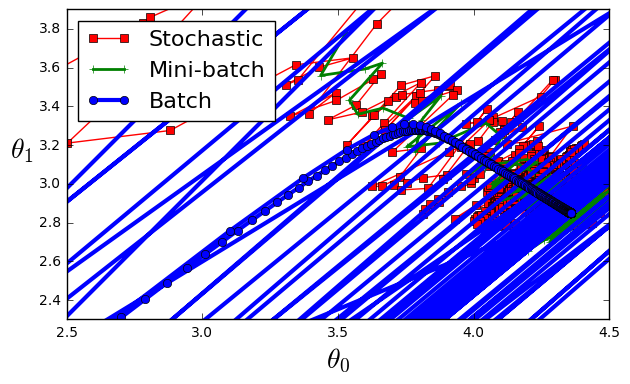

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

## Polynomial Regression
What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation.

In [30]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 + X**2 + X + 2 + np.random.randn(m,1)

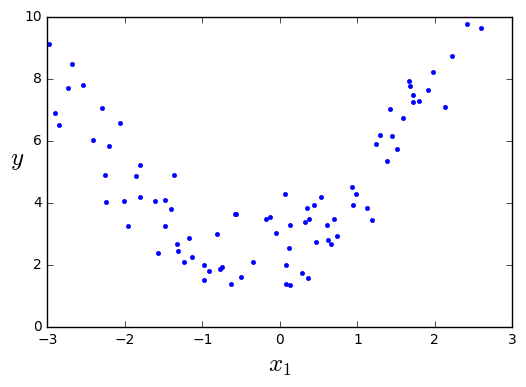

In [31]:
plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features (in this case there is
just one feature).

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [34]:
X_poly = poly_features.fit_transform(X)

In [35]:
X[0]

array([ 2.38942838])

In [36]:
X_poly[0]

array([ 2.38942838,  5.709368  ])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data.

In [37]:
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lin_reg.intercept_, lin_reg.coef_

(array([ 2.4735233]), array([[ 0.95038538,  1.02577032]]))

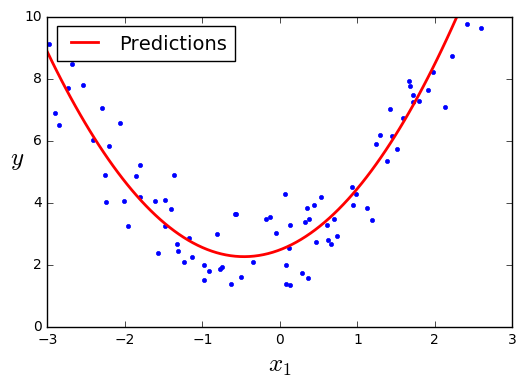

In [40]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Note that when there are multiple features, Polynomial Regression is capable of finding
relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that ``PolynomialFeatures`` also
adds all combinations of features up to the given degree. For example with two features $a$ and $b$, ``PolynomialFeatures`` with degree=3 would not only add the
features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$

## Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training
data much better than with plain Linear Regression, for example a 300-degree polynomial model would wiggle around to get as close as possible to the training instances.

Of course, this high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it. in general you won’t know what function generated the
data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data? 

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it performs
poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

Another way is to look at the learning curves: these are plots of the model’s performance
on the training set and the validation set as a function of the training set size.
To generate the plots, simply train the model several times on different sized subsets
of the training set. The following code defines a function that plots the learning
curves of a model given some training data:

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors , val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2,label = "Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "Validation Set")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 

In [43]:
lin_reg = LinearRegression()

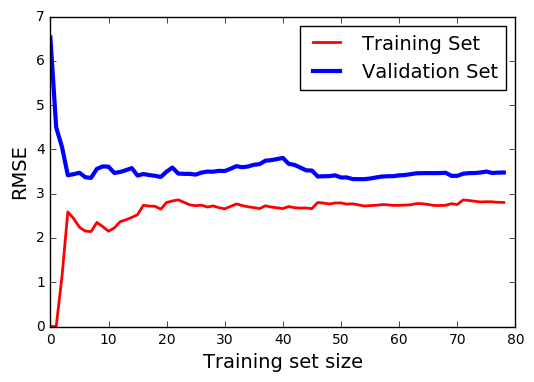

In [44]:
plot_learning_curves(lin_reg, X, y)

In [45]:
#sklearns examples looks nicer. but needs to be adjusted I think. 
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, 1-train_scores_mean - train_scores_std,
                     1-train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, 1-test_scores_mean - test_scores_std,
                    1- test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, 1-train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, 1-test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

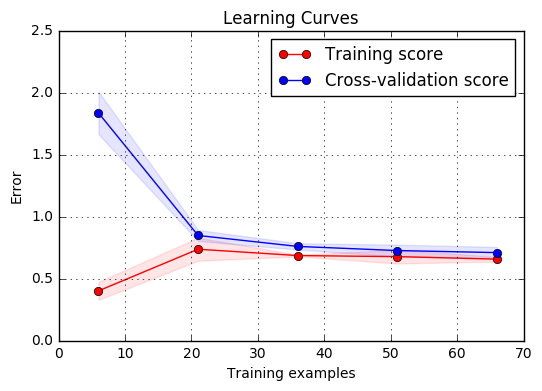

In [46]:
plot_learning_curve(LinearRegression(), "Learning Curves", X, y)
plt.show()

This deserves a bit of explanation. First, let’s look at the performance on the training
data: when there are just one or two instances in the training set, the model can fit
them perfectly, which is why the curve starts at zero. But as new instances are added
to the training set, it becomes impossible for the model to fit the training data perfectly,
both because the data is noisy and because it is not linear at all. So the error on
the training data goes up until it reaches a plateau, at which point adding new instances
to the training set doesn’t make the average error much better or worse. Now let’s
look at the performance of the model on the validation data. When the model is
trained on very few training instances, it is incapable of generalizing properly, which
is why the validation error is initially quite big. Then as the model is shown more
training examples, it learns and thus the validation error slowly goes down. However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the other curve.

These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high. Now let’s look at the learning curves of a 10th-degree polynomial model on the same
data

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg", LinearRegression())    
    ))

[0, 80, 0, 3]

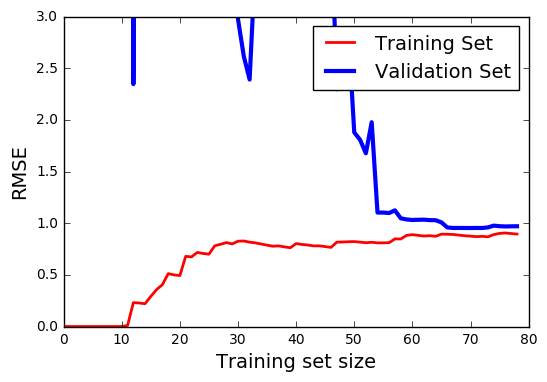

In [49]:
plot_learning_curves(polynomial_regression,X, y)
plt.axis([0, 80, 0, 3])

These learning curves look a bit like the previous ones, but there are two very important
differences:
    
* The error on the training data is much lower than with the basic Linear Regression model.
* There is a gap between the curves. This means that the model performs significantlybetter on the training data than on the validation data, which is the hall mark of an overfitting model. However, if you used a much larger training set,the two curves would continue to get closer.

### Bias/Variance Tradeoff
An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:

*Bias*

This part of the generalization error is due to wrong assumptions, such as assuming
that the data is linear when it is actually quadratic. A high-bias model is most
likely to **underfit** the training data.

*Variance*

This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree polynomial
model) is likely to have high variance, and thus to **overfit** the training
data.

*Irreducible error*

This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff

## Regularized Linear Models
As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. For example, a simple way to regularize a polynomial model
is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

### Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2 $ is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

The hyperparameter α controls how much you want to regularize the model. If $\alpha= 0$
then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

The cost function for ridge regression is thus:

$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2 $$

Note that the bias term $\theta_0$ is not regularized (the sum starts at i = 1, not 0). If we
define $w$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is
simply equal to $\frac{1}{2}(\|w\|)^2$. Where the norm represents the ℓ2 norm of the weight vector. For Gradient Descent simply add $\alpha w$ to the MSE gradient vector.

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

As with Linear Regression, we can perform Ridge Regression either by computing a
closed-form equation or by performing Gradient Descent. The pros and cons are the
same. The equation belpw shows the closed-form solution (where A is the n × n identity
matrix except with a 0 in the top-left cell, corresponding to the bias term).

$$ \hat{\theta} = \left( X^T \cdot X + \alpha A \right)^{-1} \cdot X^T \cdot y $$

Implementations in Scikit-Learn are below:

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_reg = Ridge(alpha =1, solver = "cholesky")

In [53]:
ridge_reg.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [56]:
ridge_reg.predict([[1.5]])

array([[ 7.28693892]])

In [57]:
sgd_reg = SGDRegressor(penalty = "l2")

In [58]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [59]:
sgd_reg.predict([[1.5]])

array([ 6.15600735])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
Regression.

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm.

$$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n |\theta_i| $$

An important characteristic of Lasso Regression is that it tends to completely eliminate
the weights of the least important features (i.e., set them to zero). In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

The Lasso cost function is not differentiable at $\theta_i = 0$ but Gradient
Descent still works fine if you use a subgradient vector g instead when any $\theta_i = 0$. You can think of a subgradient vector at a nondifferentiable point as an intermediate vector between the gradient
vectors around that point.

Here is a small Scikit-Learn example using the Lasso class. Note that you could
instead use an ``SGDRegressor(penalty="l1")``.

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso_reg = Lasso(alpha = 0.1)

In [62]:
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
lasso_reg.predict([[1.5]])

array([ 7.24874094])

### Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

$$J(\theta) = MSE(\theta) + r\alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2 +\frac{1-r}{2}\alpha \sum_{i=1}^n |\theta_i| $$

So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is almost
always preferable to have at least a little bit of regularization, so generally you should
avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a
few features are actually useful, you should prefer Lasso or Elastic Net since they tend
to reduce the useless features’ weights down to zero as we have discussed. In general,
Elastic Net is preferred over Lasso since Lasso may behave erratically when the number
of features is greater than the number of training instances or when several features
are strongly correlated.

Here is a short example using Scikit-Learn’s ElasticNet (l1_ratio corresponds to
the mix ratio r):

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [67]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
elastic_net.predict([[1.5]])

array([ 7.24492549])

### Earling Stopping
A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping. As the
epochs go by in a Batch Gradient Descent method, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set. However,
after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. With early stopping
you just stop training as soon as the validation error reaches the minimum.

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

Here is a basic implementation of early stopping:

In [75]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [76]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [77]:
sgd_reg = SGDRegressor(n_iter = 1, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)

In [78]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [79]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, verbose=0, warm_start=True))

## Logistic Regression
Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result.

$$ \hat{p} = h_{\theta}(x) = \sigma\left(\theta^T \cdot x\right)$$

The logistic is a sigmoid function that outputs a number between 0 and 1. 

$$ \sigma(t) = \frac{1}{1+ e^{-t}} $$

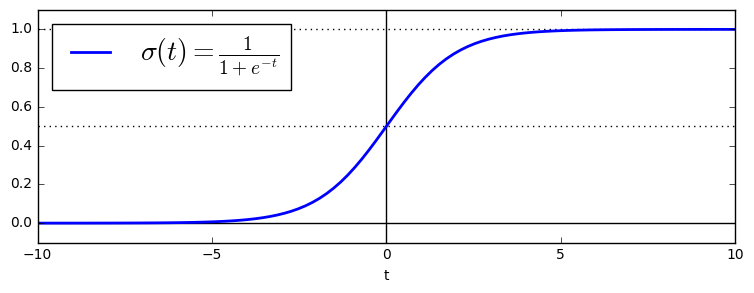

In [80]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Once the Logistic Regression has estimated the probability $\hat{p}$ that an instance x belongs to the positive class it can make its predition $\hat{y}$ easily:

$$ \hat{y} = 0 \mbox{ if } \hat{p} < 0.5, 1 \mbox{ if } \hat{p} > 0.5 $$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \geq 0.5$ when $t \geq 0$, so a Logistic Regression
model predicts 1 if $\theta^T \cdot x $ is positive, and 0 if it is negative.

The cost function of a single traning instance is then 

cost($\theta$) = -log($\hat{p}$) if y = 1

cost($\theta$) = -log(1-$\hat{p}$) if y = 0

This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1
for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so
the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want. The cost function over the whole training set is simply the average cost over all training
instances.

The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal Equation).
But the good news is that this cost function is convex, so Gradient Descent (or any
other optimization algorithm) is guaranteed to find the global minimum (if the learning
rate is not too large and you wait long enough).

### Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

In [81]:
from sklearn import datasets

In [82]:
iris = datasets.load_iris()

In [83]:
list(iris.keys())

['target', 'feature_names', 'target_names', 'data', 'DESCR']

In [84]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
log_reg = LogisticRegression()

In [88]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm

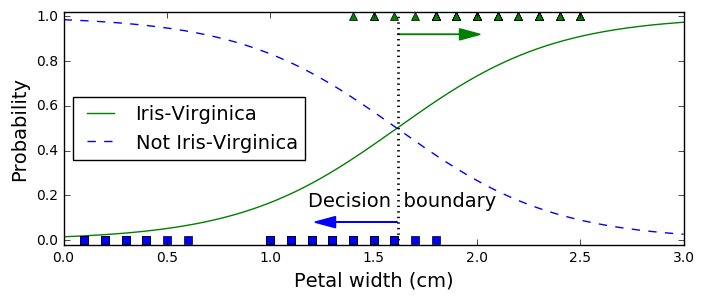

In [96]:
X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Not Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap.
Above about 2 cm the classifier is highly confident that the flower is an Iris-
Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-
Virginica, or else it will predict that it is not (even if it is not very confident):

In [97]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Just like the other linear models, Logistic Regression models can be regularized using
ℓ1 or ℓ2 penalties. Scitkit-Learn actually adds an ℓ2 penalty by default.

### Softmax Regression
Details to be found in the book

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-
Learn’s ``LogisticRegression`` uses one-versus-all by default when you train it on more
than two classes, but you can set the ``multi_class`` hyperparameter to ``"multinomial"``
to switch it to Softmax Regression instead. You must also specify a solver that supports
Softmax Regression, such as the ``"lbfgs"`` solver. It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C.

In [98]:
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

In [99]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C=10)

In [100]:
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134076e-07,   5.75276067e-02,   9.42471760e-01]])

So predicts class 2 with 94.2 % probability for an iris with 5 cm long and 2 cm wide petals. 